In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load data
df = pd.read_csv('../data/heart_disease.csv')

# Basic info
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())

Dataset Shape: (303, 14)

First few rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Data types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Missing

Target Distribution:
target
0    164
1    139
Name: count, dtype: int64

Percentage:
target
0    54.125413
1    45.874587
Name: proportion, dtype: float64


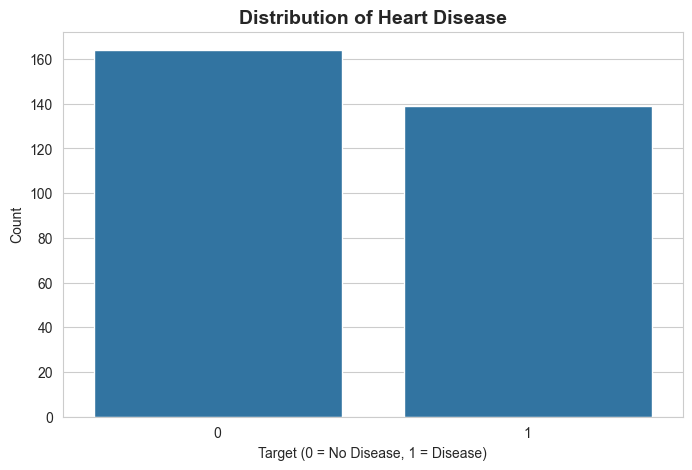

In [2]:
# The target variable: 0 = no disease, 1-4 = disease present
# We'll convert this to binary: 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("Target Distribution:")
print(df['target'].value_counts())
print("\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

In [4]:
# Let's understand what each feature means
feature_info = {
    'age': 'Age in years',
    'sex': 'Sex (1 = male, 0 = female)',
    'cp': 'Chest pain type (0-3)',
    'trestbps': 'Resting blood pressure (mm Hg)',
    'chol': 'Serum cholesterol (mg/dl)',
    'fbs': 'Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)',
    'restecg': 'Resting electrocardiographic results (0-2)',
    'thalach': 'Maximum heart rate achieved',
    'exang': 'Exercise induced angina (1 = yes, 0 = no)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment (0-2)',
    'ca': 'Number of major vessels colored by fluoroscopy (0-3)',
    'thal': 'Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)'
}

for feature, description in feature_info.items():
    print(f"{feature:12} : {description}")

age          : Age in years
sex          : Sex (1 = male, 0 = female)
cp           : Chest pain type (0-3)
trestbps     : Resting blood pressure (mm Hg)
chol         : Serum cholesterol (mg/dl)
fbs          : Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
restecg      : Resting electrocardiographic results (0-2)
thalach      : Maximum heart rate achieved
exang        : Exercise induced angina (1 = yes, 0 = no)
oldpeak      : ST depression induced by exercise
slope        : Slope of peak exercise ST segment (0-2)
ca           : Number of major vessels colored by fluoroscopy (0-3)
thal         : Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)


Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

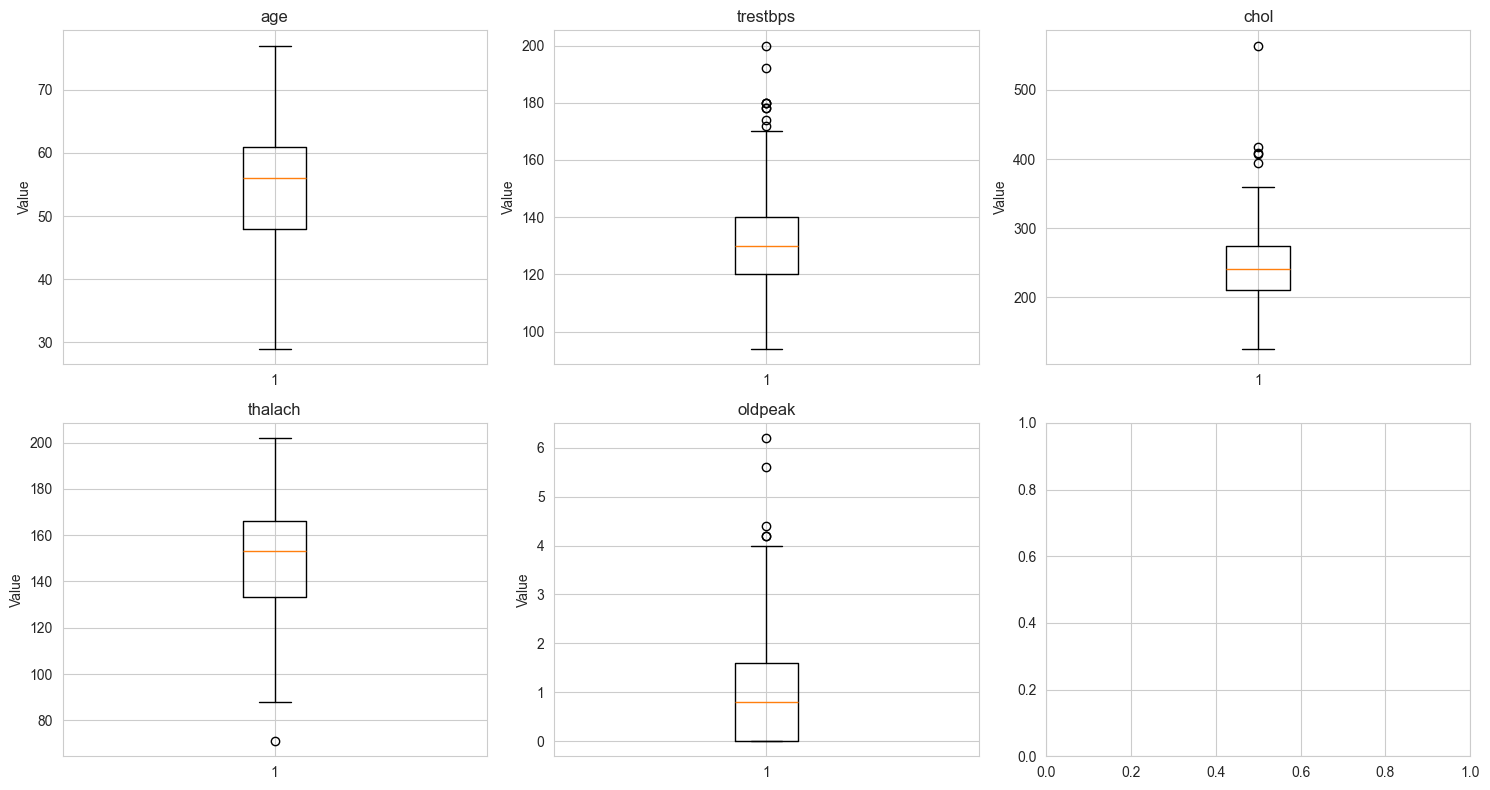

In [5]:
print("Statistical Summary:")
print(df.describe())

# Check for outliers visually
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

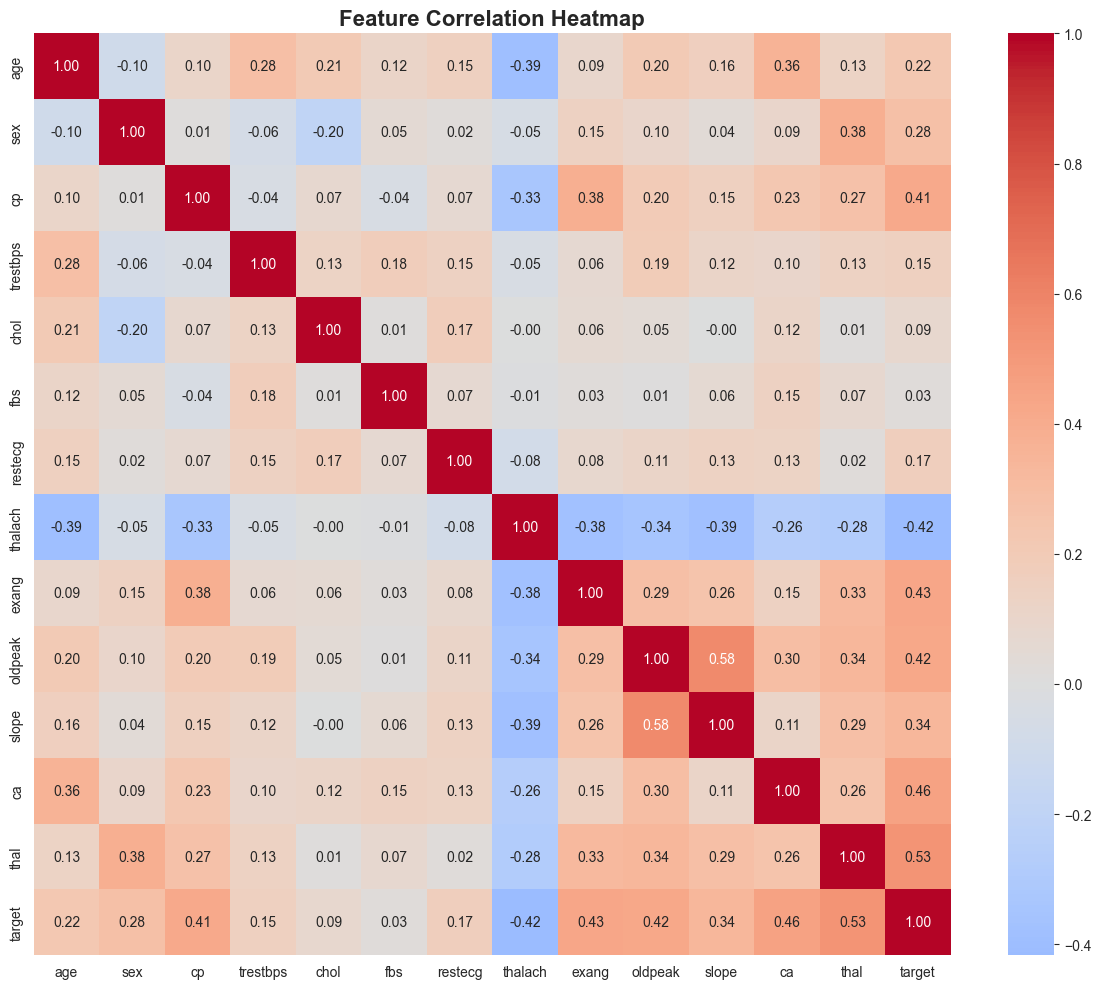


Features most correlated with Heart Disease:
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Most correlated features with target
print("\nFeatures most correlated with Heart Disease:")
print(correlation_matrix['target'].sort_values(ascending=False))

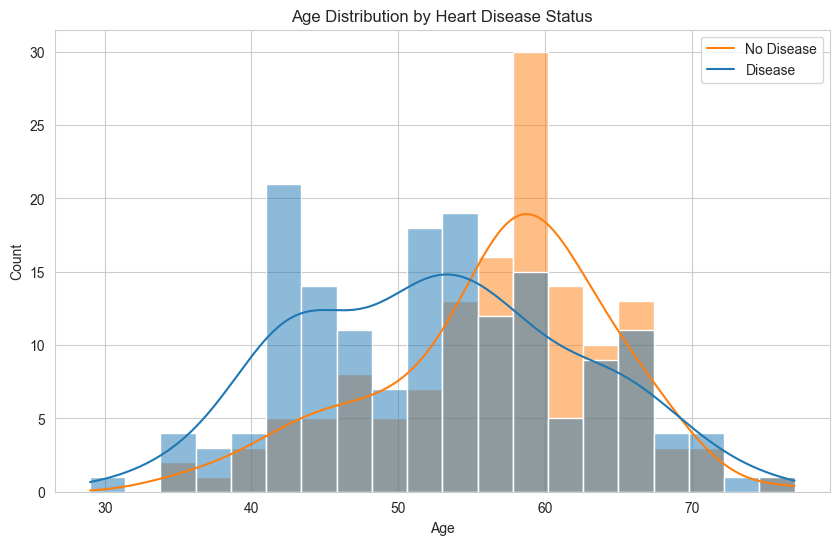

Average age by disease status:
target
0    52.585366
1    56.625899
Name: age, dtype: float64


In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['No Disease', 'Disease'])
plt.show()

print("Average age by disease status:")
print(df.groupby('target')['age'].mean())

        No Disease  Disease
Female          72       25
Male            92      114


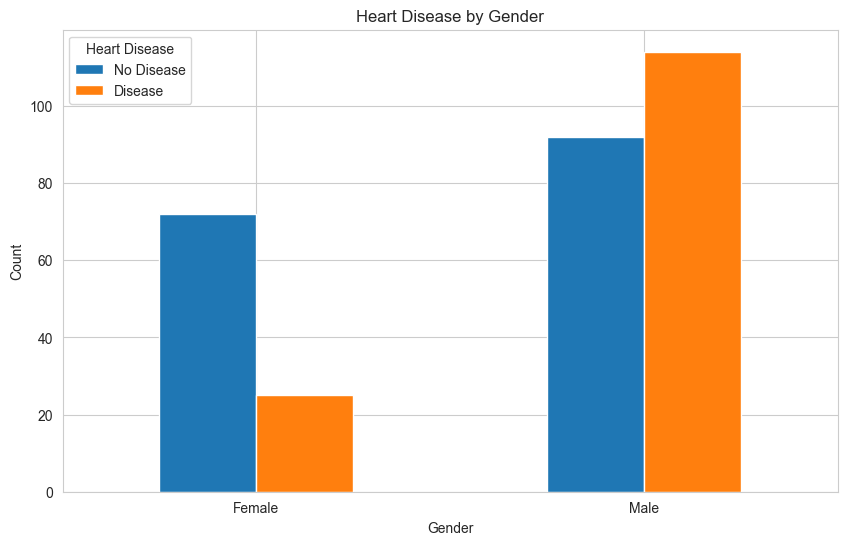

In [8]:
# Create a crosstab
gender_disease = pd.crosstab(df['sex'], df['target'])
gender_disease.index = ['Female', 'Male']
gender_disease.columns = ['No Disease', 'Disease']

print(gender_disease)

# Visualize
gender_disease.plot(kind='bar', figsize=(10, 6))
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease')
plt.show()

In [9]:
print("Missing Values Count:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values Count:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Total missing values: 6


In [10]:
print("Target Distribution:")
print(df['target'].value_counts())
print("\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

Target Distribution:
target
0    164
1    139
Name: count, dtype: int64

Percentage:
target
0    54.125413
1    45.874587
Name: proportion, dtype: float64


In [11]:
correlation_matrix = df.corr()
print("Features most correlated with Heart Disease (Target):")
print(correlation_matrix['target'].sort_values(ascending=False))

Features most correlated with Heart Disease (Target):
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64
